# 1. Task
The dataset comes from the UCI Machine Learning repository, and it is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y). The dataset can be downloaded from here.

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

In [2]:
# Inspect the data
banking_dataset_path = "dataset/banking.csv"
df = pd.read_csv(banking_dataset_path)
df.dropna()
print(df.shape)
print(list(df.columns))
df.head(5)

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [3]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

## Independent variables - What each row means
1.age (numeric) <br>
2.job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)<br>
3.marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)<br>
4.education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)<br>
5.default: has credit in default? (categorical: “no”, “yes”, “unknown”)<br>
6.housing: has housing loan? (categorical: “no”, “yes”, “unknown”)<br>
7.loan: has personal loan? (categorical: “no”, “yes”, “unknown”)<br>
8.contact: contact communication type (categorical: “cellular”, “telephone”)<br>
9.month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)<br>
10.day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)<br>
11.duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model <br>
12.campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13.pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14.previous: number of contacts performed before this campaign and for this client (numeric)<br>
15.poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)<br>
16.emp.var.rate: employment variation rate — (numeric)<br>
17.cons.price.idx: consumer price index — (numeric)<br>
18.cons.conf.idx: consumer confidence index — (numeric)<br>
19.euribor3m: euribor 3 month rate — (numeric)<br>
20.nr.employed: number of employees — (numeric)<br>

# Dependent variable
y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)

In [4]:
df['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [5]:
df['education'] = np.where(df['education'] == "basic.4y", 'basic', df['education'])
df['education'] = np.where(df['education'] == "basic.9y", 'basic', df['education'])
df['education'] = np.where(df['education'] == "basic.6y", 'basic', df['education'])
df['education'].unique()

array(['basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [6]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


# Inspect the dependent variable data

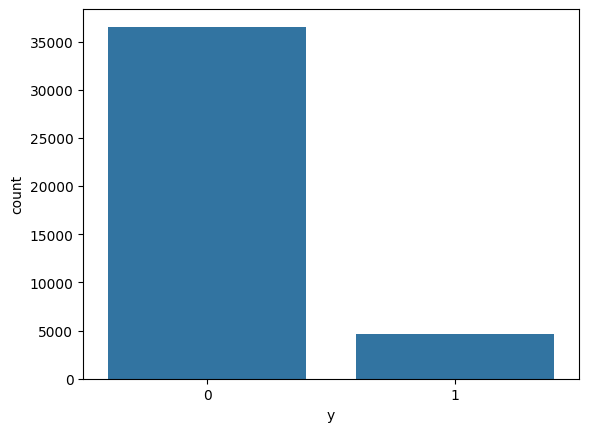

y
0    36548
1     4640
Name: count, dtype: int64

In [7]:
sb.countplot(data=df, x='y')
plt.show()
df['y'].value_counts()

As we can see there are 36548 people who did not subscribe and 4640 who did subscribe

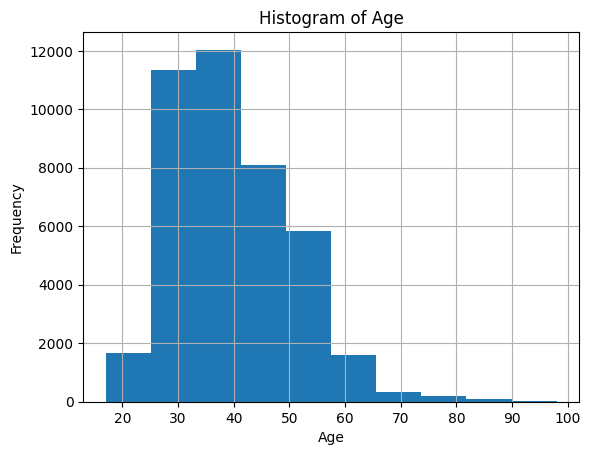

In [8]:
df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

In [9]:
job_dummy_list = pd.get_dummies(df['job'])
df = df.join(job_dummy_list)
df = df.drop('job', axis=1)
df

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,44,married,basic,unknown,yes,no,cellular,aug,thu,210,...,False,False,False,False,False,False,False,False,False,False
1,53,married,unknown,no,no,no,cellular,nov,fri,138,...,False,False,False,False,False,False,False,True,False,False
2,28,single,university.degree,no,yes,no,cellular,jun,thu,339,...,False,False,True,False,False,False,False,False,False,False
3,39,married,high.school,no,no,no,cellular,apr,fri,185,...,False,False,False,False,False,True,False,False,False,False
4,55,married,basic,no,yes,no,cellular,aug,fri,137,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,married,high.school,unknown,no,yes,telephone,jun,thu,222,...,False,False,False,True,False,False,False,False,False,False
41184,31,married,basic,unknown,no,no,telephone,may,thu,196,...,False,True,False,False,False,False,False,False,False,False
41185,42,single,university.degree,unknown,yes,yes,telephone,may,wed,62,...,False,False,False,False,False,False,False,False,False,False
41186,48,married,professional.course,no,no,yes,telephone,oct,tue,200,...,False,False,False,False,False,False,False,True,False,False


In [10]:
for i in df.columns:
    print(f"The {i} column contais the following elements :{df[i].unique()}")

The age column contais the following elements :[44 53 28 39 55 30 37 36 27 34 41 33 26 52 35 40 32 49 38 47 46 29 54 42
 72 48 43 56 31 24 68 59 50 45 25 57 63 58 60 64 51 23 20 74 80 61 62 75
 21 82 77 70 76 73 66 22 71 19 79 88 65 67 81 18 84 69 98 85 83 78 92 86
 94 17 91 89 87 95]
The marital column contais the following elements :['married' 'single' 'divorced' 'unknown']
The education column contais the following elements :['basic' 'unknown' 'university.degree' 'high.school' 'professional.course'
 'illiterate']
The default column contais the following elements :['unknown' 'no' 'yes']
The housing column contais the following elements :['yes' 'no' 'unknown']
The loan column contais the following elements :['no' 'yes' 'unknown']
The contact column contais the following elements :['cellular' 'telephone']
The month column contais the following elements :['aug' 'nov' 'jun' 'apr' 'jul' 'may' 'oct' 'mar' 'sep' 'dec']
The day_of_week column contais the following elements :['thu' 'fri' 'tue

In [11]:
poutcome_dummy_list = pd.get_dummies(df['poutcome'])
df = df.join(poutcome_dummy_list)
df = df.drop('poutcome', axis=1)
df

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,retired,self-employed,services,student,technician,unemployed,unknown,failure,nonexistent,success
0,44,married,basic,unknown,yes,no,cellular,aug,thu,210,...,False,False,False,False,False,False,False,False,True,False
1,53,married,unknown,no,no,no,cellular,nov,fri,138,...,False,False,False,False,True,False,False,False,True,False
2,28,single,university.degree,no,yes,no,cellular,jun,thu,339,...,False,False,False,False,False,False,False,False,False,True
3,39,married,high.school,no,no,no,cellular,apr,fri,185,...,False,False,True,False,False,False,False,False,True,False
4,55,married,basic,no,yes,no,cellular,aug,fri,137,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,married,high.school,unknown,no,yes,telephone,jun,thu,222,...,True,False,False,False,False,False,False,False,True,False
41184,31,married,basic,unknown,no,no,telephone,may,thu,196,...,False,False,False,False,False,False,False,False,True,False
41185,42,single,university.degree,unknown,yes,yes,telephone,may,wed,62,...,False,False,False,False,False,False,False,False,True,False
41186,48,married,professional.course,no,no,yes,telephone,oct,tue,200,...,False,False,False,False,True,False,False,False,True,False


In [12]:
df['default'].unique()
df['default'] = np.where(df['default'] == "unknown", 'basic', df['education'])

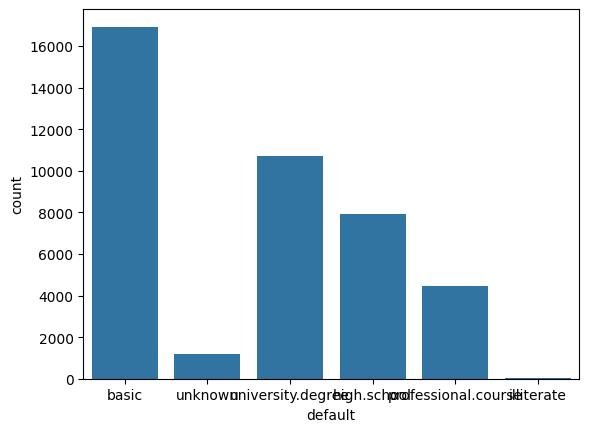

default
basic                  16933
university.degree      10718
high.school             7905
professional.course     4438
unknown                 1183
illiterate                11
Name: count, dtype: int64

In [13]:
sb.countplot(data=df, x='default')
plt.show()
df['default'].value_counts()